# Деревья Решений

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import requests

headers = {"User-Agent": "ChatGPT", "Content-Type": "application/json;charset=UTF-8"}

response = requests.get(
    "https://2700chess.com/?per-page=100",
    headers=headers,
)

In [ ]:
html = response.content

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html, 'html.parser')

table = soup.find('table')

In [ ]:
df = pd.read_html(str(table))[0]

/tmp/ipykernel_1253/1339507137.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


In [ ]:
df

,#,↑↓,Name,Unnamed: 3,Classic,+/−,Unnamed: 6,Rapid,Unnamed: 8,Blitz,Unnamed: 10,Unnamed: 11,Age,Unnamed: 13
0,1,NaN,"Carlsen, Magnus",Norway,2830.0,0.0,NaN,2823.0,NaN,2886.0,NaN,NaN,33,NaN
1,2,NaN,"Caruana, Fabiano",United States of America,2804.0,0.0,NaN,2729.0,NaN,2790.0,NaN,NaN,31,NaN
2,3,NaN,"Nakamura, Hikaru",United States of America,2788.0,0.0,NaN,2746.0,NaN,2874.0,NaN,NaN,36,NaN
3,4,NaN,"Ding, Liren",China,2762.0,0.0,NaN,2818.0,NaN,2787 i,NaN,NaN,31,NaN
4,5,NaN,"Giri, Anish",Netherlands,2762.0,0.0,NaN,2687.0,NaN,2715.0,NaN,NaN,29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,↑13,"Cheparinov, Ivan",Bulgaria,2640.5,+6.5,NaN,2638.0,NaN,2593.0,NaN,NaN,37,NaN
96,97,NaN,"Ter-Sahakyan, Samvel",Armenia,2640.0,0.0,NaN,2542.0,NaN,2540.0,NaN,NaN,30,NaN
97,98,NaN,"Melkumyan, Hrant",Armenia,2640.0,0.0,NaN,2686 i,NaN,2604 i,NaN,NaN,34,NaN
98,99,↑8,"Puranik, Abhimanyu",India,2639.3,+4.3,NaN,2553.0,NaN,2533.0,NaN,NaN,24,NaN


In [ ]:
df.columns

Index(['#', '↑↓', 'Name', 'Unnamed: 3', 'Classic', '+/−', 'Unnamed: 6',
       'Rapid', 'Unnamed: 8', 'Blitz', 'Unnamed: 10', 'Unnamed: 11', 'Age',
       'Unnamed: 13'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   #            100 non-null    int64  
 1   ↑↓           69 non-null     object 
 2   Name         100 non-null    object 
 3   Unnamed: 3   100 non-null    object 
 4   Classic      100 non-null    float64
 5   +/−          100 non-null    object 
 6   Unnamed: 6   0 non-null      float64
 7   Rapid        100 non-null    object 
 8   Unnamed: 8   0 non-null      float64
 9   Blitz        100 non-null    object 
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
 12  Age          100 non-null    int64  
 13  Unnamed: 13  0 non-null      float64
dtypes: float64(6), int64(2), object(6)
memory usage: 11.1+ KB


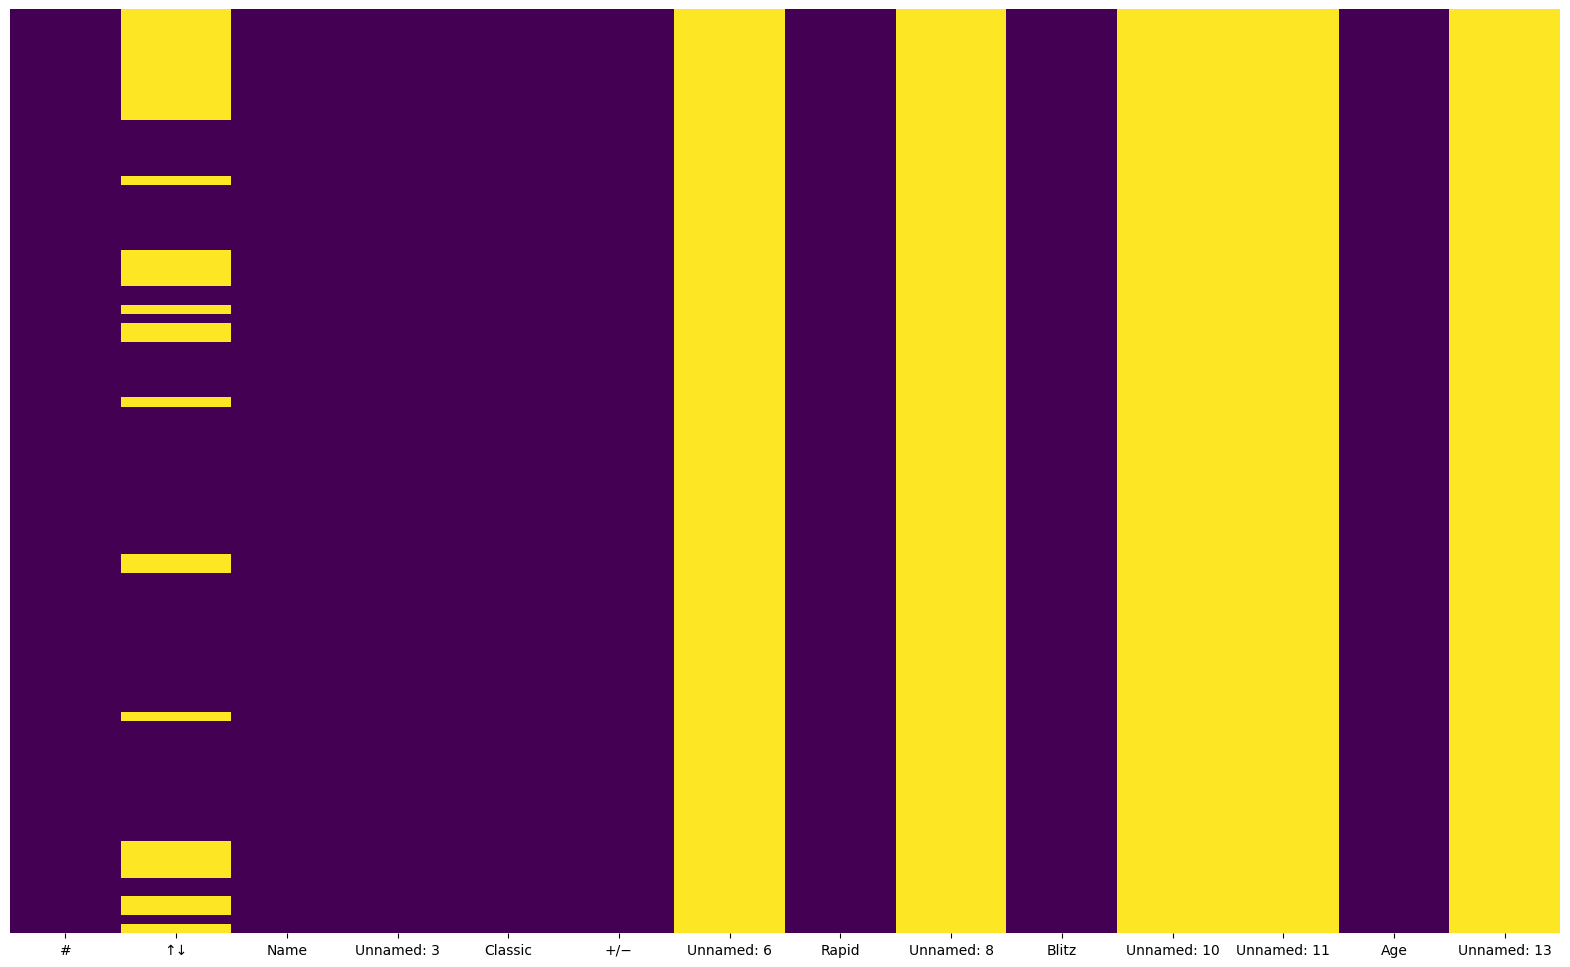

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [ ]:
X = df[['Classic','Rapid','Blitz','Age', 'Unnamed: 3']].copy()

In [ ]:
X

,Classic,Rapid,Blitz,Age,Unnamed: 3
0,2830.0,2823.0,2886.0,33,Norway
1,2804.0,2729.0,2790.0,31,United States of America
2,2788.0,2746.0,2874.0,36,United States of America
3,2762.0,2818.0,2787 i,31,China
4,2762.0,2687.0,2715.0,29,Netherlands
...,...,...,...,...,...
95,2640.5,2638.0,2593.0,37,Bulgaria
96,2640.0,2542.0,2540.0,30,Armenia
97,2640.0,2686 i,2604 i,34,Armenia
98,2639.3,2553.0,2533.0,24,India


In [ ]:
X = X.rename({'Unnamed: 3':'Country'}, axis=1)
X

,Classic,Rapid,Blitz,Age,Country
0,2830.0,2823.0,2886.0,33,Norway
1,2804.0,2729.0,2790.0,31,United States of America
2,2788.0,2746.0,2874.0,36,United States of America
3,2762.0,2818.0,2787 i,31,China
4,2762.0,2687.0,2715.0,29,Netherlands
...,...,...,...,...,...
95,2640.5,2638.0,2593.0,37,Bulgaria
96,2640.0,2542.0,2540.0,30,Armenia
97,2640.0,2686 i,2604 i,34,Armenia
98,2639.3,2553.0,2533.0,24,India


In [ ]:
str2float = lambda x: float(str(x).replace('i', '')) if isinstance(x, str) else x

In [ ]:
X.columns

Index(['Classic', 'Rapid', 'Blitz', 'Age', 'Country'], dtype='object')

In [ ]:
float_columns = ['Classic', 'Rapid', 'Blitz', 'Age']

X[float_columns] = X[float_columns].applymap(str2float)

/tmp/ipykernel_1253/506712649.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X[float_columns] = X[float_columns].applymap(str2float)


In [ ]:
X.loc[:, X.columns != 'Country'] = X.loc[:, X.columns != 'Country'].applymap(
    lambda x: float(str(x).replace('i', '')) if isinstance(x, str) else x
)
X

/tmp/ipykernel_1253/1701462723.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.loc[:, X.columns != 'Country'] = X.loc[:, X.columns != 'Country'].applymap(


,Classic,Rapid,Blitz,Age,Country
0,2830.0,2823.0,2886.0,33,Norway
1,2804.0,2729.0,2790.0,31,United States of America
2,2788.0,2746.0,2874.0,36,United States of America
3,2762.0,2818.0,2787.0,31,China
4,2762.0,2687.0,2715.0,29,Netherlands
...,...,...,...,...,...
95,2640.5,2638.0,2593.0,37,Bulgaria
96,2640.0,2542.0,2540.0,30,Armenia
97,2640.0,2686.0,2604.0,34,Armenia
98,2639.3,2553.0,2533.0,24,India


In [ ]:
html

b'\n    <!DOCTYPE html>\n    <html lang="en-US">\n    <head>\n\n<!-- Google Tag Manager -->\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n})(window,document,\'script\',\'dataLayer\',\'GTM-NS79KBH\');</script>\n<!-- End Google Tag Manager -->\n\n        \n<meta charset="UTF-8"/>\n    <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no">\n<meta name="csrf-param" content="_csrf">\n    <meta name="csrf-token" content="jkrKUxnV88GJBIgFXaoaSioHc3bqg9gBbRPvgX61eNDDM_4adJmRjed9v2pt8Gx4YVQyQ9q6j1keZ43bNOMcog==">\n<title>Live Chess Ratings - 2700chess.com</title>\n\n\n<meta name="keywords" content="chess, 2700, ratings, live, top, players, fide, pgn, game, tournament, broadcast, rapid, 

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Classic  100 non-null    float64
 1   Rapid    100 non-null    float64
 2   Blitz    100 non-null    float64
 3   Age      100 non-null    int64  
 4   Country  100 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 4.0+ KB


In [ ]:
X, y = X.drop('Blitz', axis=1), X.Blitz

In [ ]:
X

,Classic,Rapid,Age,Country
0,2830.0,2823.0,33,Norway
1,2804.0,2729.0,31,United States of America
2,2788.0,2746.0,36,United States of America
3,2762.0,2818.0,31,China
4,2762.0,2687.0,29,Netherlands
...,...,...,...,...
95,2640.5,2638.0,37,Bulgaria
96,2640.0,2542.0,30,Armenia
97,2640.0,2686.0,34,Armenia
98,2639.3,2553.0,24,India


In [ ]:
y

0     2886.0
1     2790.0
2     2874.0
3     2787.0
4     2715.0
       ...  
95    2593.0
96    2540.0
97    2604.0
98    2533.0
99    2564.0
Name: Blitz, Length: 100, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10
)

In [ ]:
# from sklearn.tree import DecisionTreeRegressor

In [ ]:
# tree = DecisionTreeRegressor(max_depth=2)

In [ ]:
# tree.fit(X_train, y_train)

In [ ]:
# y_pred = tree.predict(X_test)

In [ ]:
# from sklearn.metrics import mean_absolute_error

In [ ]:
# mean_absolute_error(y_test, y_pred)

In [ ]:
# from sklearn.tree import plot_tree

In [ ]:
# plot_tree(tree, feature_names=["Age", "Classic", "Rapid"]);

In [ ]:
# from sklearn.datasets import make_moons, make_circles # import function from the library
# import random
# random.seed(1)

# N = 1000

# X, y = make_circles(n_samples=N, noise=0.1, factor=0.6, random_state=1)

# #adding noise
# for i, yy in enumerate(y):
#     if random.randint(0,30)% 30 == 0:
#         y[i] = (y[i]+1)%2

# #train test split
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size=0.5,    # 20% for test, 80% for train
#                                                     random_state=123) # shuffle objects before split

In [ ]:
# # Create an figure with a custom size
# plt.figure(figsize=(9, 6))

# # Plot all objects with y == 0 (class 0)
# plt.scatter(X[y == 0, 0],     # selects all objects with y == 0 and the 1st column of X
#             X[y == 0, 1],     # selects all objects with y == 0 and the 2nd column of X
#             color='r',        # points color
#             label='0')        # label for the plot legend


# # Plot all objects with y == 1 (class 1)
# plt.scatter(X[y == 1, 0],     # selects all objects with y == 1 and the 1st column of X
#             X[y == 1, 1],     # selects all objects with y == 1 and the 2nd column of X
#             color='b',        # points color
#             label='1')        # label for the plot legend

# plt.xlabel('X1') # set up X-axis label
# plt.ylabel('X2') # set up Y-axis label

# plt.legend(loc='best') # create the plot legend and set up it position
# plt.grid() # create grid on the plot

# plt.show() # display the plot

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import classification_report, mean_squared_error

# clf = DecisionTreeClassifier(criterion='entropy')
# clf.fit(X_train, y_train)
# pred = clf.predict(X_test)
# print(classification_report(y_test, pred))

In [ ]:
# %matplotlib inline
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt


# def plot_desicion_boundaries():
#     # Create an figure with a custom size
#     plt.figure(figsize=(9, 6))

#     # Plot all objects with y == 0 (class 0)
#     plt.scatter(X_test[y_test == 0, 0],     # selects all objects with y == 0 and the 1st column of X
#                 X_test[y_test == 0, 1],     # selects all objects with y == 0 and the 2nd column of X
#                 color='r',                  # points color
#                 label='0')                  # label for the plot legend


#     # Plot all objects with y == 1 (class 1)
#     plt.scatter(X_test[y_test == 1, 0],     # selects all objects with y == 1 and the 1st column of X
#                 X_test[y_test == 1, 1],     # selects all objects with y == 1 and the 2nd column of X
#                 color='b',                  # points color
#                 label='1')                  # label for the plot legend


#     ### THIS IS JUST MAGIC :)

#     # plot decision boundary
#     h=0.01
#     x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
#     y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                          np.arange(y_min, y_max, h))

#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#     #Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1] # Probas

#     Z = Z.reshape(xx.shape)

#     plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.5, levels=1)

#     ### THE END OF THE MAGIC


#     plt.xlabel('X1') # set up X-axis label
#     plt.ylabel('X2') # set up Y-axis label

#     plt.legend(loc='best') # create the plot legend and set up it position
#     plt.grid() # create grid on the plot
#     plt.colorbar()

    # plt.show() # display the plot

In [ ]:
# plot_desicion_boundaries()

In [ ]:
# for depth in [1,2,4,7,10,15,25,50]:
#     print('Max_depth: ', depth)
#     clf = DecisionTreeClassifier(max_depth=depth, criterion='gini')
#     clf.fit(X_train, y_train)
#     pred = clf.predict(X_test)
#     print(classification_report(y_test, pred))
#     plot_desicion_boundaries()

# Градиентный бустинг

## XGBoost

In [ ]:
!pip show xgboost

Name: xgboost
Version: 2.0.3
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: /root/venv/lib/python3.9/site-packages
Requires: numpy, scipy
Required-by: 


In [ ]:
from xgboost import XGBRegressor

# XGBRegressor?

In [ ]:
pd.get_dummies(X_train, columns=['Country'])

,Classic,Rapid,Age,Country_Armenia,Country_Austria,Country_Azerbaijan,Country_Bulgaria,Country_China,Country_Croatia,Country_Czech Republic,...,Country_Poland,Country_Romania,Country_Serbia,Country_Slovenia,Country_Spain,Country_Turkiye,Country_Ukraine,Country_United States of America,Country_Uzbekistan,Country_Vietnam
90,2648.0,2666.0,43,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
70,2662.0,2633.0,32,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
50,2680.4,2677.0,41,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44,2690.0,2639.0,22,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
76,2659.1,2522.0,39,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2648.8,2558.0,18,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28,2715.6,2651.0,23,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64,2666.1,2573.0,30,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
15,2744.5,2671.0,20,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X_train['Country'] = X_train['Country'].astype('category')

In [ ]:
bst = XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.2,
    objective='reg:squarederror',
    enable_categorical=True
)

# fit model
bst.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
X_test['Country'] = X_test['Country'].astype('category')

In [ ]:
# make predictions
preds = bst.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, preds)

49.541455078125

## LightGBM

In [ ]:
!pip show lightgbm

Name: lightgbm
Version: 4.3.0
Summary: LightGBM Python Package
Home-page: https://github.com/microsoft/LightGBM
Author: 
Author-email: 
License: The MIT License (MIT)
        
        Copyright (c) Microsoft Corporation
        
        Permission is hereby granted, free of charge, to any person obtaining a copy
        of this software and associated documentation files (the "Software"), to deal
        in the Software without restriction, including without limitation the rights
        to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
        copies of the Software, and to permit persons to whom the Software is
        furnished to do so, subject to the following conditions:
        
        The above copyright notice and this permission notice shall be included in all
        copies or substantial portions of the Software.
        
        THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
        IMPLIED, INCLUDING BUT NOT LIMITED TO 

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error

# Convert 'Country' to category if not already done
X_train['Country'] = X_train['Country'].astype('category')
X_test['Country'] = X_test['Country'].astype('category')

# Initialize and fit the LightGBM model
model_lgb = lgb.LGBMRegressor(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.2,
    objective='regression'  # Default objective for regression in LightGBM
)

model_lgb.fit(X_train, y_train, categorical_feature='auto')  # 'auto' lets LightGBM identify categorical features

# Predict and calculate MAE
preds_lgb = model_lgb.predict(X_test)
mae_lgb = mean_absolute_error(y_test, preds_lgb)
print(f"Mean Absolute Error (LightGBM): {mae_lgb}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 4
[LightGBM] [Info] Start training from score 2649.027499
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

## CatBoost

In [ ]:
!pip show catboost

Name: catboost
Version: 1.2.2
Summary: CatBoost Python Package
Home-page: https://catboost.ai
Author: CatBoost Developers
Author-email: 
License: Apache License, Version 2.0
Location: /root/venv/lib/python3.9/site-packages
Requires: graphviz, matplotlib, numpy, pandas, plotly, scipy, six
Required-by: 


In [ ]:
np.where(X_train.dtypes == 'category')[0]

array([3])

In [ ]:
import catboost as cb
from sklearn.metrics import mean_absolute_error

# Initialize and fit the CatBoost model
model_cb = cb.CatBoostRegressor(
    iterations=100,
    depth=5,
    learning_rate=0.9,
    loss_function='RMSE',  # While RMSE is used, CatBoost does not need a specific objective for regression
    verbose=False  # Set to True to see training logs
)

# CatBoost can handle categorical features directly, but you need to specify their indices
categorical_features_indices = np.where(X_train.dtypes == 'category')[0]

model_cb.fit(
    X_train, y_train, 
    cat_features=categorical_features_indices
)

# Predict and calculate MAE
preds_cb = model_cb.predict(X_test)
mae_cb = mean_absolute_error(y_test, preds_cb)
print(f"Mean Absolute Error (CatBoost): {mae_cb}")


Mean Absolute Error (CatBoost): 44.216222726205295


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1d5b3784-c0d1-42b2-b62a-f221187b0e50' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>